In [13]:
#
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM
print("Versión de Tensorflow: ", tf.__version__)


Versión de Tensorflow:  2.3.0


In [6]:
df2= pd.read_csv("PanelFiltrado.csv", delimiter=",", error_bad_lines=False, header=0, decimal=",")
df2.index=pd.to_datetime(df2["Fecha"])

In [7]:
df2

,Fecha,Fuente,Estación,EstaciónID,Año,Mes,Día,Hora,Unidad,PM10,PM2.5
Fecha,,,,,,,,,,,
2015-01-01 01:00:00,2015-01-01 01:00:00,RMCAB,Bolivia,1,2015,1,1,1,mg/m3,NaN,NaN
2015-01-01 02:00:00,2015-01-01 02:00:00,RMCAB,Bolivia,1,2015,1,1,2,mg/m3,NaN,NaN
2015-01-01 03:00:00,2015-01-01 03:00:00,RMCAB,Bolivia,1,2015,1,1,3,mg/m3,NaN,NaN
2015-01-01 04:00:00,2015-01-01 04:00:00,RMCAB,Bolivia,1,2015,1,1,4,mg/m3,NaN,NaN
2015-01-01 05:00:00,2015-01-01 05:00:00,RMCAB,Bolivia,1,2015,1,1,5,mg/m3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08 12:00:00,2021-04-08 12:00:00,RMCAB,Usme,18,2021,4,8,12,mg/m3,NaN,3.4
2021-04-08 13:00:00,2021-04-08 13:00:00,RMCAB,Usme,18,2021,4,8,13,mg/m3,NaN,7.6
2021-04-08 14:00:00,2021-04-08 14:00:00,RMCAB,Usme,18,2021,4,8,14,mg/m3,NaN,6.5


,PM10,PM2.5,Fecha
Fecha,,,
2019-03-04 00:00:00,37.0,20.0,2019-03-04 00:00:00
2019-03-04 01:00:00,25.0,20.0,2019-03-04 01:00:00
2019-03-04 02:00:00,34.0,17.0,2019-03-04 02:00:00
2019-03-04 03:00:00,28.0,19.0,2019-03-04 03:00:00
2019-03-04 04:00:00,31.0,16.0,2019-03-04 04:00:00
...,...,...,...
2019-03-31 20:00:00,29.0,15.0,2019-03-31 20:00:00
2019-03-31 21:00:00,15.0,9.0,2019-03-31 21:00:00
2019-03-31 22:00:00,17.0,8.0,2019-03-31 22:00:00


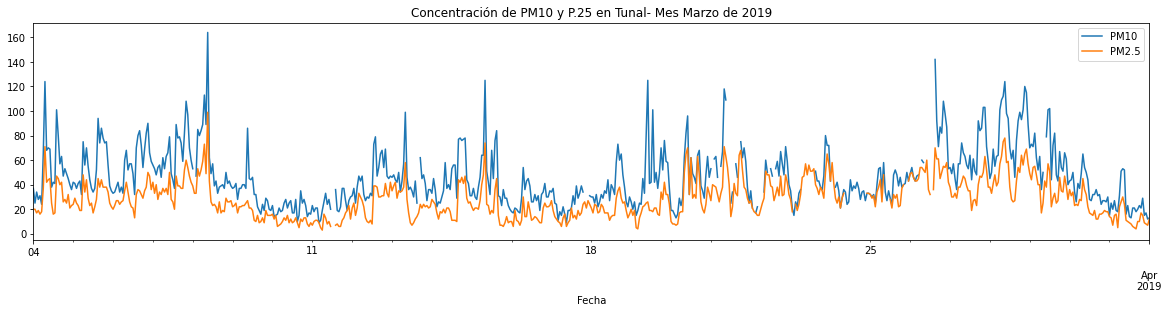

In [8]:
TUNAL=df2[df2["Estación"]=="Tunal"]
TUNAL=TUNAL[["PM10","PM2.5","Fecha"]]
TUNAL[["PM10","PM2.5"]]=TUNAL[["PM10","PM2.5"]].astype("float")
TUNALMARZO=TUNAL.loc['2019-03-04 00:00:00':'2019-04-01 00:00:00']
#TUNALAÑO2019MARZOSEMANA1=Tunal.loc['2019-03-04 00:00:00':'2019-03-10 23:00:00']
#TUNALAÑO2019MARZOSEMANA1.plot(title="Concentración de PM10 y P.25 en Tunal- Mes Marzo de 2019",figsize=(15,4))
TUNALMARZO.plot(title="Concentración de PM10 y P.25 en Tunal- Mes Marzo de 2019",figsize=(20,4))
TUNALMARZO

653


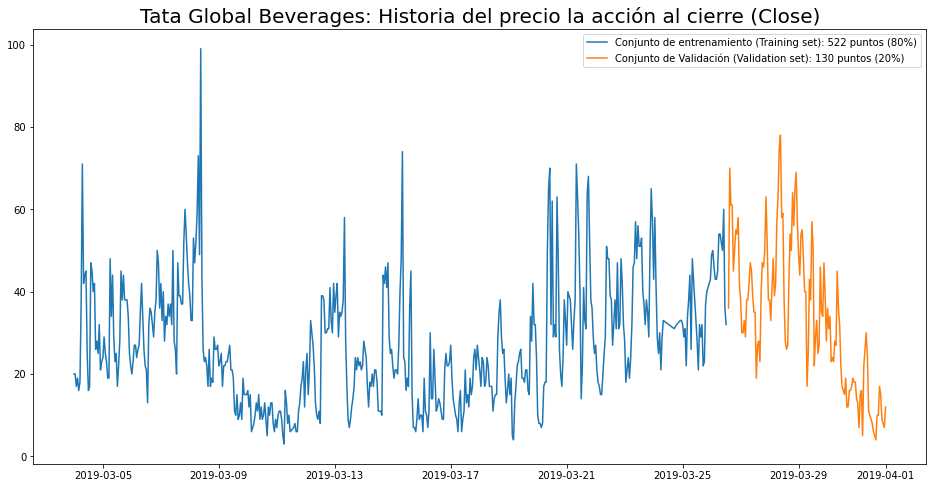

In [51]:
TUNALMARZOPM25= pd.DataFrame(TUNALMARZO[['PM2.5']])
TUNALMARZOPM25= TUNALMARZOPM25.dropna()
print(len(TUNALMARZOPM25))
# plot
plt.figure(figsize=(16,8))
plt.plot(TUNALMARZOPM25[:int(len(TUNALMARZOPM25)*80/100)], label="Conjunto de entrenamiento (Training set): {} puntos (80%)".format(int(len(TUNALMARZOPM25)*80/100)))
plt.plot(TUNALMARZOPM25[int(len(TUNALMARZOPM25)*80/100):], label='Conjunto de Validación (Validation set): {} puntos (20%)'.format(int(len(TUNALMARZOPM25)-len(TUNALMARZOPM25)*80/100)))#248 data
plt.title("Tata Global Beverages: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()



In [52]:
#creating train and test sets
dataset = TUNALMARZOPM25.values

# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [53]:
# tamaños para entrenamiento y validación
len_train = int(len(TUNALMARZOPM25)*80/100) # 80%
len_valid = len(TUNALMARZOPM25)-int(len(TUNALMARZOPM25)*80/100)# 20%
len_data = len_train + len_valid
# 
# Longitud de las tiras de datos para hacer las predicciones
time_step = 60
# días a predecir
days = 1
#
# crea datos de entrenamiento
x_train, y_train = [], []
#
for i in range(time_step ,len_train ):
    # x: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    x_train.append(scaled_data[i-time_step :i,0])
    # y: el siguiente dato
    y_train.append(scaled_data[i:i+days,0])
x_train, y_train = np.array(x_train), np.array(y_train)
#
#
# Arregla el tamaño, porque la capa LSTM espera tensores de tres dimensiones: 
# (batch, longitud de la tira de datos, número de features)
# Como es una serie univariada solamente hay 1 feature.
#
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],y_train.shape[1],1))
#
print(x_train.shape)
print(y_train.shape)


(462, 60, 1)
(462, 1, 1)


In [54]:
# unidades de salida de las capas LSTM
#
units = 70
#
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1],1)),
    tf.keras.layers.LSTM(units=units),
    tf.keras.layers.Dense(1)])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 70)            20160     
_________________________________________________________________
lstm_7 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 71        
Total params: 59,711
Trainable params: 59,711
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='mse', optimizer='adam')

In [56]:
history = model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
15/15 [==============================] - 1s 79ms/step - loss: 0.0301
Epoch 2/20
15/15 [==============================] - 1s 92ms/step - loss: 0.0168
Epoch 3/20
15/15 [==============================] - 1s 85ms/step - loss: 0.0159
Epoch 4/20
15/15 [==============================] - 1s 86ms/step - loss: 0.0158
Epoch 5/20
15/15 [==============================] - 1s 79ms/step - loss: 0.0152
Epoch 6/20
15/15 [==============================] - 1s 82ms/step - loss: 0.0154
Epoch 7/20
15/15 [==============================] - 1s 77ms/step - loss: 0.0151
Epoch 8/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0147
Epoch 9/20
15/15 [==============================] - 1s 71ms/step - loss: 0.0147
Epoch 10/20
15/15 [==============================] - 1s 72ms/step - loss: 0.0143
Epoch 11/20
15/15 [==============================] - 1s 80ms/step - loss: 0.0139
Epoch 12/20
15/15 [==============================] - 1s 87ms/step - loss: 0.0133
Epoch 13/20
15/15 [==================

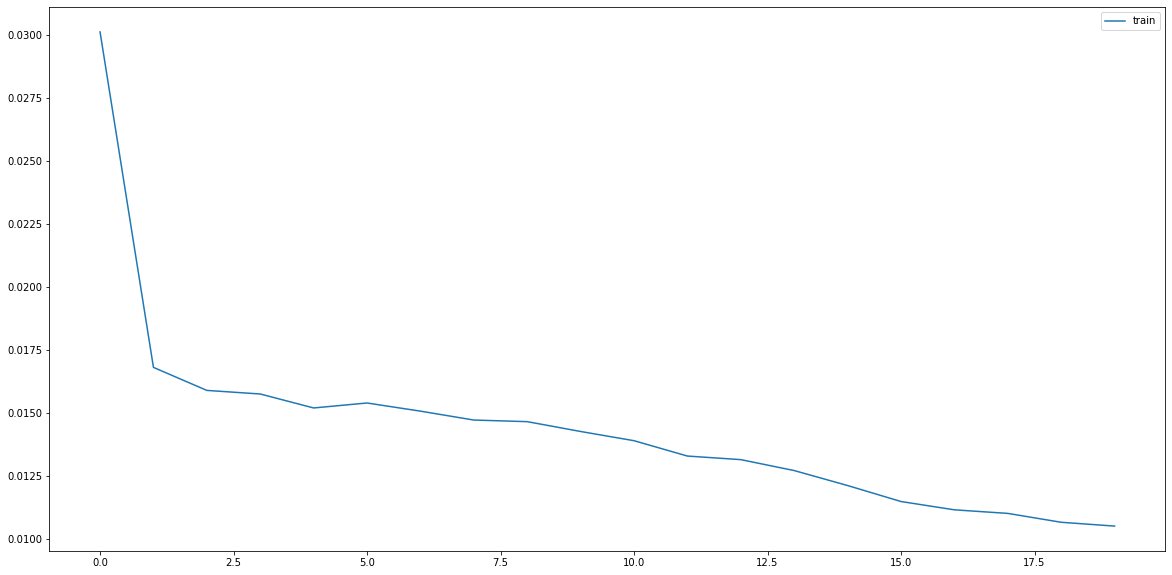

In [57]:
plt.plot(history.history['loss'], label='train')
plt.legend();

In [58]:
inputs = TUNALMARZOPM25[len_data - len_valid - time_step:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

x_test = []
y_test = []

# aqui vamos

for i in range(time_step,inputs.shape[0]):
    x_test.append(inputs[i-time_step:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [59]:
x_test.shape

(131, 60, 1)

In [60]:
# predictions
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [61]:
prediction.shape

(131, 1)

In [62]:
# Funciones auxiliares
#
def plot_prediction(real, prediccion):
    plt.plot(real,color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

#

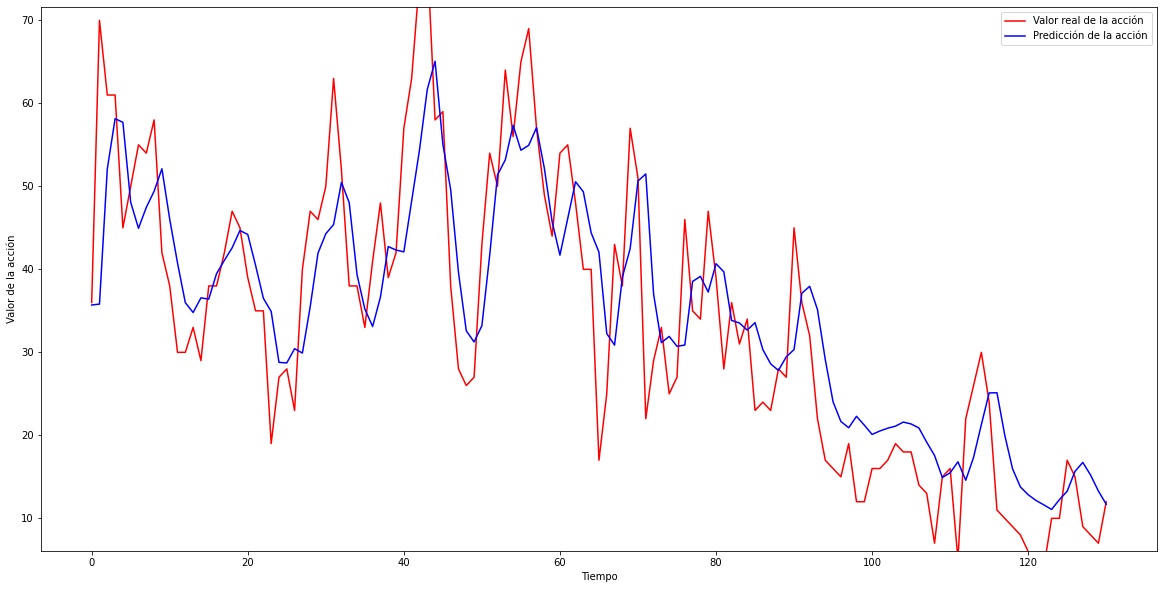

In [63]:
# Graficar resultadosdata[len_data - len_valid - time_step:].valuesdata['Close'][987:]
set_validation = TUNALMARZOPM25[len_data - len_valid :].values
plot_prediction(set_validation ,prediction)

In [64]:
train = pd.DataFrame(TUNALMARZOPM25[:len_train])
valid = pd.DataFrame(TUNALMARZOPM25[len_train:])
valid['Predictions'] = prediction


In [65]:
np.sqrt(np.mean(np.power(valid["PM2.5"].values-valid['Predictions'].values,2)))
rmsLSTM = np.sqrt(np.mean(np.power(valid["PM2.5"].values-valid['Predictions'].values,2)))
rmsLSTM 

9.09834734969196

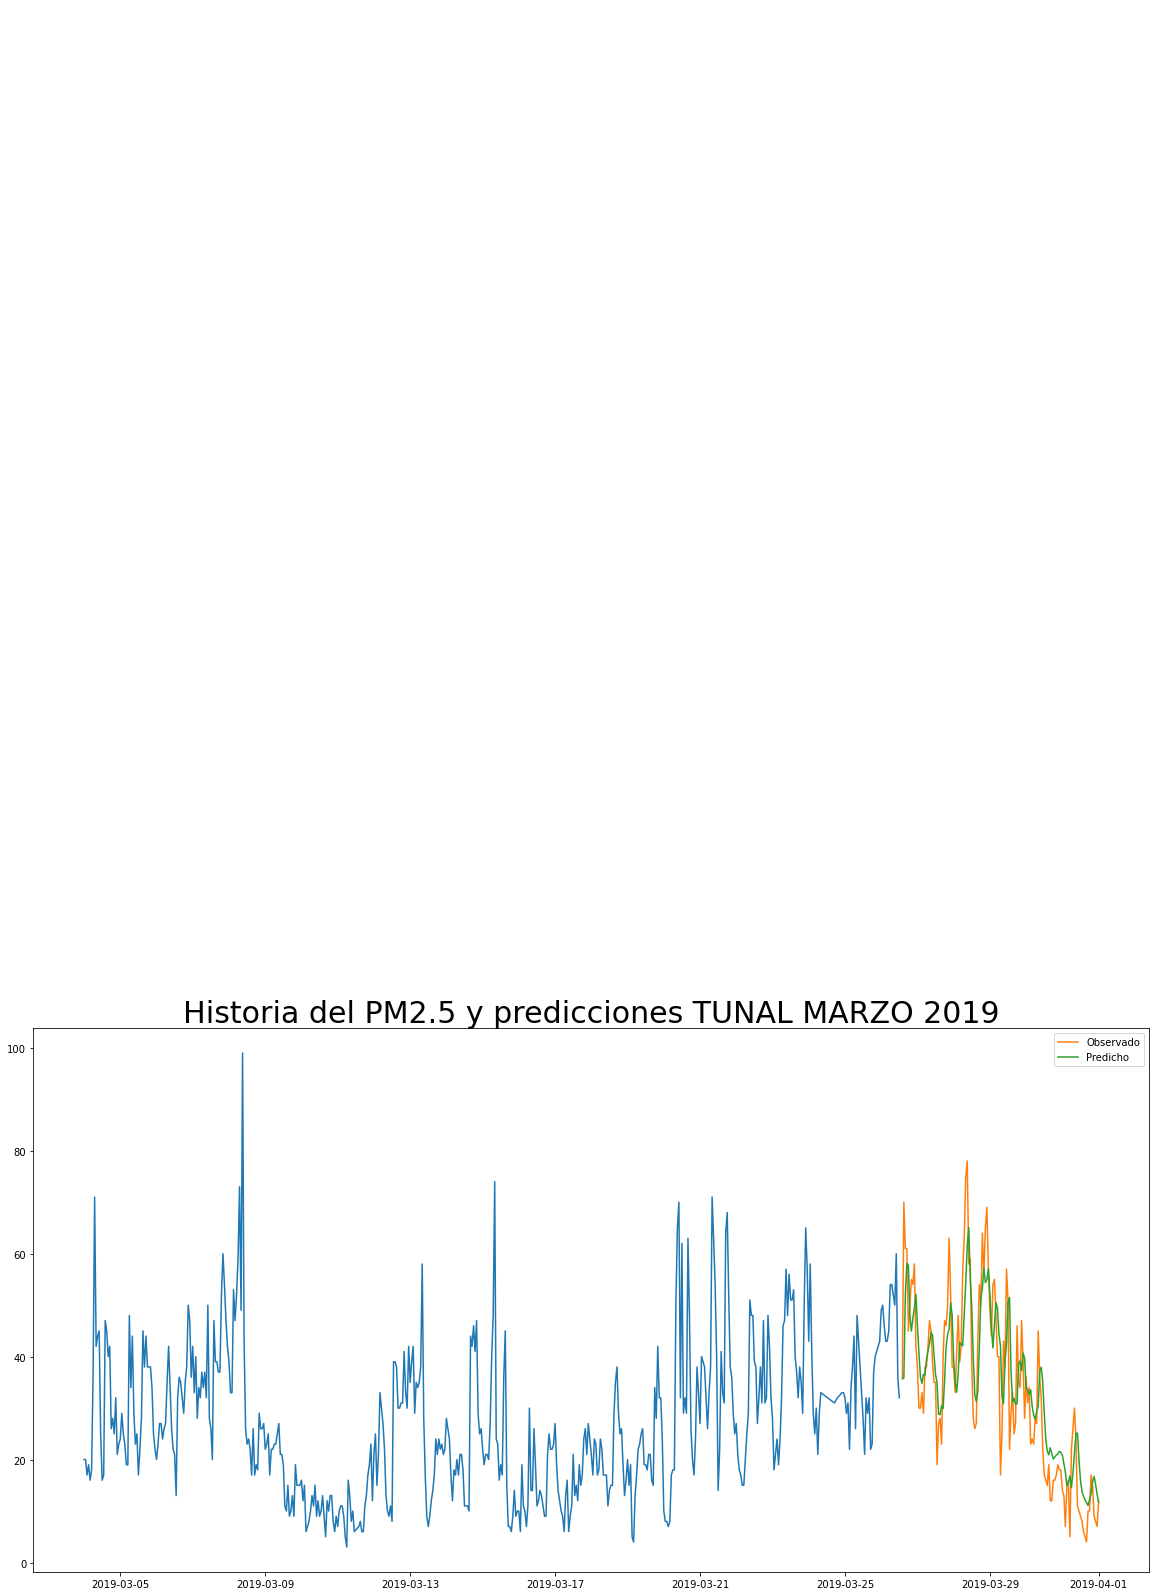

In [66]:
#for plotting
rmsLSTM = np.sqrt(np.mean(np.power(valid["PM2.5"].values-valid['Predictions'].values,2)))

train = pd.DataFrame(TUNALMARZOPM25[:len_train])
valid = pd.DataFrame(TUNALMARZOPM25[len_train:])

valid['Predictions'] = prediction
plt.plot(train["PM2.5"])
plot = plt.plot(valid[["PM2.5",'Predictions']])
plt.annotate("rms = "+str(rmsLSTM) , xy=(TUNALMARZOPM25.index[1],300), size = 15)
plt.legend(plot, ("Observado","Predicho"))
plt.title("Historia del PM2.5 y predicciones TUNAL MARZO 2019", size = 30)
plt.show()